попробовать сети 34, 50 \
попробовать кластеризацию в предобработке изображений \
сохранять в test наиболее точную модель при обучении \
\
Убрать из train удаление модели, возвращать из train модель \

In [ ]:
import torch
import random
import numpy as np
import pandas as pd

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
import torchvision.datasets
from tqdm import tqdm
import pandas as pd

In [ ]:
CIFAR_train = torchvision.datasets.CIFAR10('./', download=True, train=True)
CIFAR_test = torchvision.datasets.CIFAR10('./', download=True, train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
X_train = torch.FloatTensor(CIFAR_train.data)
y_train = torch.LongTensor(CIFAR_train.targets)
X_test = torch.FloatTensor(CIFAR_test.data)
y_test = torch.LongTensor(CIFAR_test.targets)

In [ ]:
len(y_train), len(y_test)

(50000, 10000)

In [ ]:
X_train.min(), X_train.max()

(tensor(0.), tensor(255.))

In [ ]:
X_train /= 255.
X_test /= 255.

In [ ]:
CIFAR_train.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

tensor(6) tensor(9) tensor(9) tensor(4) tensor(1) tensor(1) tensor(2) tensor(7) tensor(8) tensor(3) 

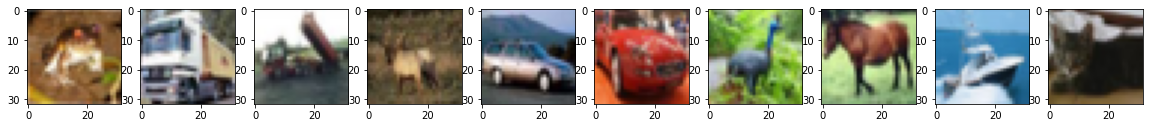

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([50000, 32, 32, 3]), torch.Size([50000]))

In [ ]:
X_train = X_train.permute(0, 3, 1, 2)
X_test = X_test.permute(0, 3, 1, 2)

In [ ]:
X_train.shape

torch.Size([50000, 3, 32, 32])

добавить отображение прогресса при обучении в train \
добавить оценку времени ушедшего на обучение \
добавить учет правильных ответов по классам для валидации \
отрисовывать схему с учетом этих оценок

In [ ]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device) to
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-3)
    
    batch_size = 500

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(30):
        print("epoch ", epoch)
        order = np.random.permutation(len(X_train))

        if epoch == 7:
            print("lr=0.5e-3")
            optimizer = torch.optim.Adam(net.parameters(), lr=0.5e-3)
        
        if epoch == 12:
            print("lr=1.0e-4")
            optimizer = torch.optim.Adam(net.parameters(), lr=1.0e-4)


        for start_index in tqdm(range(0, len(X_train), batch_size)):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()
            
            X_batch

        net.eval()
        with torch.no_grad():
            test_preds = net.forward(X_test)
            loss_value = loss(test_preds, y_test).item()
            test_loss_history.append(loss_value)

            accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().item()
            test_accuracy_history.append(accuracy)
            #print(test_preds.argmax(dim=1))
            #print(y_test)

        print("accuracy = ", accuracy)
        print("\n\n")

    return test_accuracy_history, test_loss_history

accuracies = {}
losses = {}

In [ ]:
from torchvision.models import resnet18
model = resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
accuracies['resnet18'], losses['resnet18'] = \
    train(model, X_train, y_train, X_test, y_test)

epoch  0


100%|██████████| 334/334 [00:08<00:00, 38.36it/s]


accuracy =  0.7404999732971191



epoch  1


100%|██████████| 334/334 [00:08<00:00, 37.64it/s]


accuracy =  0.7680000066757202



epoch  2


100%|██████████| 334/334 [00:08<00:00, 37.56it/s]


accuracy =  0.7786999940872192



epoch  3


100%|██████████| 334/334 [00:08<00:00, 37.36it/s]


accuracy =  0.6574000120162964



epoch  4


100%|██████████| 334/334 [00:08<00:00, 38.00it/s]


accuracy =  0.7946999669075012



epoch  5


100%|██████████| 334/334 [00:08<00:00, 37.36it/s]


accuracy =  0.8121999502182007



epoch  6


100%|██████████| 334/334 [00:08<00:00, 37.57it/s]


accuracy =  0.8064999580383301



epoch  7
lr=0.5e-3


100%|██████████| 334/334 [00:08<00:00, 37.33it/s]


accuracy =  0.8321999907493591



epoch  8


100%|██████████| 334/334 [00:08<00:00, 38.63it/s]


accuracy =  0.8274999856948853



epoch  9


100%|██████████| 334/334 [00:08<00:00, 37.81it/s]


accuracy =  0.8188999891281128



epoch  10


100%|██████████| 334/334 [00:08<00:00, 37.77it/s]


accuracy =  0.8233000040054321



epoch  11


100%|██████████| 334/334 [00:08<00:00, 37.49it/s]


accuracy =  0.8260999917984009



epoch  12
lr=1.0e-4


100%|██████████| 334/334 [00:08<00:00, 38.40it/s]


accuracy =  0.8441999554634094



epoch  13


100%|██████████| 334/334 [00:08<00:00, 37.86it/s]


accuracy =  0.8448999524116516



epoch  14


100%|██████████| 334/334 [00:08<00:00, 37.50it/s]


accuracy =  0.8400999903678894



epoch  15


100%|██████████| 334/334 [00:08<00:00, 37.56it/s]


accuracy =  0.8393999934196472



epoch  16


100%|██████████| 334/334 [00:08<00:00, 38.23it/s]


accuracy =  0.8398000001907349



epoch  17


100%|██████████| 334/334 [00:08<00:00, 37.89it/s]


accuracy =  0.8387999534606934



epoch  18


100%|██████████| 334/334 [00:08<00:00, 37.20it/s]


accuracy =  0.8379999995231628



epoch  19


100%|██████████| 334/334 [00:08<00:00, 37.66it/s]


accuracy =  0.8422999978065491



epoch  20


100%|██████████| 334/334 [00:08<00:00, 37.83it/s]


accuracy =  0.8410999774932861



epoch  21


100%|██████████| 334/334 [00:08<00:00, 38.31it/s]


accuracy =  0.8381999731063843



epoch  22


100%|██████████| 334/334 [00:08<00:00, 37.53it/s]


accuracy =  0.8400999903678894



epoch  23


100%|██████████| 334/334 [00:08<00:00, 37.59it/s]


accuracy =  0.840499997138977



epoch  24


100%|██████████| 334/334 [00:08<00:00, 37.63it/s]


accuracy =  0.8400999903678894



epoch  25


100%|██████████| 334/334 [00:08<00:00, 38.70it/s]


accuracy =  0.8379999995231628



epoch  26


100%|██████████| 334/334 [00:08<00:00, 37.81it/s]


accuracy =  0.8396999835968018



epoch  27


100%|██████████| 334/334 [00:08<00:00, 37.52it/s]


accuracy =  0.8382999897003174



epoch  28


100%|██████████| 334/334 [00:08<00:00, 37.61it/s]


accuracy =  0.8406999707221985



epoch  29


100%|██████████| 334/334 [00:08<00:00, 38.49it/s]


accuracy =  0.8387999534606934





In [ ]:
from torchvision.models import resnet34
model = resnet34(pretrained=True)

In [ ]:
accuracies['resnet34'], losses['resnet34'] = \
    train(model, X_train, y_train, X_test, y_test)

In [ ]:
from torchvision.models import resnet50
model = resnet50(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
accuracies['resnet50'], losses['resnet50'] = \
    train(model, X_train, y_train, X_test, y_test)

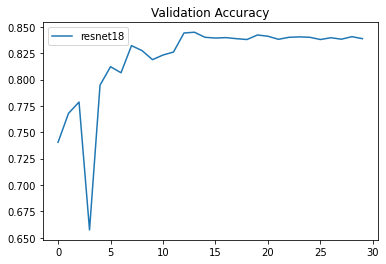

In [ ]:
for experiment_id in accuracies.keys():
    plt.plot(accuracies[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Accuracy');

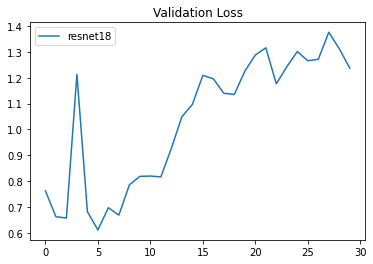

In [ ]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss');

In [ ]:
from torchvision.models import resnet50, ResNet50_Weights

# Old weights with accuracy 76.130%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# New weights with accuracy 80.858%
resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

# Best available weights (currently alias for IMAGENET1K_V2)
# Note that these weights may change across versions
resnet50(weights=ResNet50_Weights.DEFAULT)

# Strings are also supported
resnet50(weights="IMAGENET1K_V2")

# No weights - random initialization
resnet50(weights=None)

In [ ]:

data = np.zeros((10,10), dtype=int)
D = pd.DataFrame(data)

In [ ]:

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
test_preds = model.forward(X_test)

In [ ]:
for x, y in zip(test_preds.argmax(dim=1).tolist(), y_test.tolist()):
    D[y][x] += 1

In [ ]:
D

,0,1,2,3,4,5,6,7,8,9
0,878,16,36,22,4,8,8,5,33,15
1,10,905,1,6,1,2,3,3,11,45
2,20,0,817,43,37,32,27,16,11,8
3,9,5,32,693,45,138,49,32,7,8
4,9,1,40,44,822,27,28,18,1,3
5,9,5,33,124,32,746,11,48,3,1
6,4,4,22,27,21,10,867,4,3,3
7,7,1,14,26,30,30,2,861,1,6
8,36,18,3,7,6,3,3,4,916,28
9,18,45,2,8,2,4,2,9,14,883
